### Notebook basics
- Μπορείτε να εκτελέσετε τον κώδικα κελί-κελί
- για να εκτελέσετε το κελί, πατάτε shift+enter
- με escape+a εισάγετε νέο κελί από πάνω, escape+b νέο κελί από κάτω
- για να τυπώσετε μια μεταβλητη x γράφετε print(x) ή απλά x (όπου x το όνομα της μεταβλητής)
- στην python δεν δηλώνουμε τύπο μεταβλητής, αποδίδεται κατά την εξίωση
- πακέτο numpy (short for Numerical Python) για πράξεις πινάκων

In [ ]:
# !pip install gdown
# η παραπάνω γραμμή κάνει εγκατάσταση του πακέτου που κατεβάζει από το google drive - απαραίτητο για Jupyter, οχι για google colab

import gdown         # φορτώνουμε το πακέτο

# Tα δεδομένα που θα χρησιμοποιήσουμε είναι από το πακέτο pyHammer, που προσδιορίζει αυτόματα το φασματικό τύπο αστέρων.
# Για το σκοπό αυτό χρησιμοποιεί πρότυπα φάσματα που θα χρησιμοποιήσουμε και σε αυτήν την άσκηση.
# Ολόκληρο το πακέτο μπορεί να βρεθεί στο https://github.com/BU-hammerTeam/PyHammer.git
# Για την άσκησή μας αρκούν τα φάσματα που μπορούν να ανακτηθούν από το παρακάτω google drive.

# χρησιμοποιηστε 1 από τα παρακάτω URL
FOLDER_URL = "https://drive.google.com/drive/folders/1P3AkOhhO2Sxj7EoRGFRNyV2-pFogzh64?usp=drive_link"
#FOLDER_URL = "https://drive.google.com/drive/folders/18CHfPKpyYOQH5uIri2sleZVPJCLrQxRD?usp=drive_link"
#FOLDER_URL = "https://drive.google.com/drive/folders/1jxJZjt1-ZKPmUNFHGHzIwYhumQ0xluQU?usp=drive_link"
#FOLDER_URL = "https://drive.google.com/drive/folders/1SeeVOLX9MrdkbugElK8zGOTdSmbvng9l?usp=drive_link"
gdown.download_folder(FOLDER_URL, output="pyHammer_templates", use_cookies=False,remaining_ok=True, quiet=False)

In [1]:
# οι εντολές του λειτουργικου δουλευουν με θαυμαστικό. Αν π.χ., θέλουμε να δουμε τι κατεβάσαμε στη directory pyHammer_templates
!ls pyHammer_templates

# άλλο παράδειγμα - εντολή λειτουργικου που δειχνει τις πρωτες n γραμμές ενός αρχείου. Εδώ n=10
!head -n 10 pyHammer_templates/O5.txt

A0.txt B0.txt F0.txt G0.txt K0.txt M0.txt O5.txt
A6.txt B5.txt F5.txt G5.txt K5.txt M5.txt
# O5 from O5.fits  |  columns: wavelength[Angstrom]  flux
3650.049673 29.292498
3650.109787 29.176138
3650.171907 29.176138
3650.232023 29.176138
3650.292141 29.318214
3650.354263 29.407499
3650.414383 28.986143
3650.474503 28.712540
3650.536629 28.712540


Σημείωση για μονάδες: μήκος κύματος [ Angstrom ] και ροή [ 10$^{-17}$ erg cm$^{-2}$ s$^{-1}$ Angstrom$^{-1}$ ]

In [4]:
# Διαβάζουμε τα δεδομένα από τα αρχεία που κατεβάσαμε στον κωδικά μας, μέσω της numerical python

import numpy as np   # ονοματίζουμε τη βιβλιοθήκη για ευκολία χρήσης

# Παράδειγμα χρήσης - η συναρτηση μας επιστρέφει 2 πινακες
wavelength1, flux1 = np.loadtxt("pyHammer_templates/B0.txt", unpack=True)

#help(np.loadtxt)    # διαβάζουμε για το πως δουλευει η συνάρτηση

In [5]:
! head -n 10 pyHammer_templates/B0.txt

# B0 from B0.fits  |  columns: wavelength[Angstrom]  flux
3650.049673 18.926594
3650.109787 18.748228
3650.171907 18.660767
3650.232023 18.459284
3650.292141 18.442411
3650.354263 18.442411
3650.414383 18.442411
3650.474503 18.488136
3650.536629 18.488136


In [9]:
stars_b = {'O5': 50000}
stars_b['G5']=8000
stars_b['G5']

8000

In [6]:
# Θέλουμε να κάνουμε το ίδιο πράγμα αυτόματα - όχι n φορές για n αστέρια.
# Tα ονόματα των αστέρων, όπως και τη θερμοκρασία τους, που θα μας χρειαστεί παρακάτω, τα οργανώνουμε σε λεξικό.
# Λεξικό = μία λίστα που τα στοιχεία της τα καλούμε με το όνομα.

# Λιστα:
# stars = ["O5","B0","B5","A0","A6","F0","F5","G0","G5","K0","K5","M0","M5"]

# Λεξικό:
stars = {'O5': 50000, 'B0': 50360, 'B5': 13700, 'A0': 10540, 'A6': 8650, 'F0': 7560, 'F5': 6930, 'G0': 6060, 'G5': 5400, 'K0': 5320, 'K5': 4120, 'M0': 3580, 'M5': 2360}
# Tα παραπάνω είναι για τα συγκεκριμένα αστέρια. Από τη θεωρία, γενικά εύρη θερμοκρασίων (Κ):
# O > 30000, B 30000 – 10000, A 10000 – 7500, F 7400 – 6000, G 6000 – 5200, K 5200 – 3700, M 3700 – 2400

# Παραδειγμα
for i in stars: print(i, stars[i])


O5 50000
B0 50360
B5 13700
A0 10540
A6 8650
F0 7560
F5 6930
G0 6060
G5 5400
K0 5320
K5 4120
M0 3580
M5 2360


In [14]:
# Τώρα μπορούμε να φτιαξουμε έναν πινακα απο διδιάστατους πίνακες
# ή ακόμα καλύτερα ένα λεξικό από διδιάστατους πίνακες ώστε να χρησιμοποιούμε το όνομα του κάθε αστεριού για να βρίσκουμε τα δεδομένα του.
# Σε ένα λεξικό, μπορούμε να προσθέσουμε στοιχεία ως stars['NewQuantinty']=value
# δηλαδή απλά καλώντας τα περιεχόμενα με εναν δεικτη που δεν υπάρχει ήδη κι εξισώνοντας με την τιμή που θέλουμε.

spectra = {}  # κενό λεξικό

# νέα καταχώρηση στο λεξικό, με δείκτη 'O5' κλπ και δεδομένα το διδιαστατο πίνακα για το φάσμα
for i in stars:
    spectra[i] = (np.loadtxt(i+".txt", unpack=True)) # προσθέτω στο λεξικό 1 διδιαστατο πίνακα τη φορα [wavelength, flux] για κάθε αστέρι

In [15]:
# Τωρα το εκάστοτε spectra[i] είναι ο διδιαστατος πίνακας των δεδομένων ενός αστεριού, με μία κολώνα για το λ, και μία κολώνα για τη ροή
print(spectra["G0"][0])
print(spectra["G0"][1])

[ 3650.049673  3650.109787  3650.171907 ... 10199.542329 10199.710311
 10199.878295]
[1.081287 1.087208 1.098052 ... 0.597705 0.599199 0.599199]


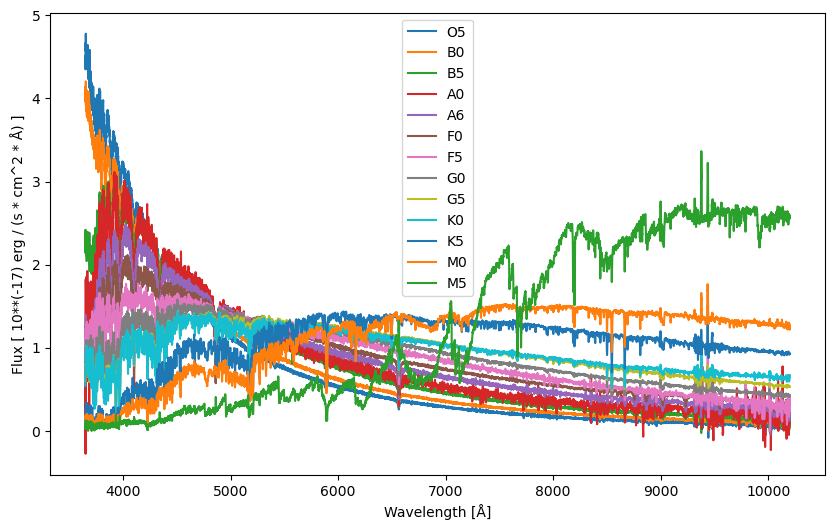

In [18]:
# Ένα πρώτο plot να δουμε τα φάσματα της βιβλιοθήκης συγκρίτικά το ένα με το άλλο
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))

for i in stars:
    plt.plot(spectra[i][0], spectra[i][1]/np.mean(spectra[i][1]), label=i)  # Mπορούμε να τα πλοτάρουμε κανονικοποιημένα / μέση τιμη

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [ 10**(-17) erg / (s * cm^2 * Å) ]")
plt.legend()
#plt.figure(figsize=(10,6))


In [19]:
# Θέλουμε να εστιάσουμε σε κάποια γραμμή απορρόφησης ανά αστερι. Εδώ δίνονται τα κεντρικά μήκη κύματος βασικων φασματικών γραμμών.
# Μπορείτε να προσθέσετε γραμμές κατά το δοκούν.

# Γραμμή απορρόφησης <-> μήκος κύματος (Α) + ευρος συνεχούς πάλι εν είδει λεξικού
lines = {
    "Ha":   {"lam": 6562.8,  "cont_left": [6505,6530],  "cont_right": [6620,6645]},      # Balmer a (2→3)
    "Hb":   {"lam": 4861.3,  "cont_left": [4780,4820],  "cont_right": [4920,4950]},      # Balmer a (2→4)
    "Hg":   {"lam": 4340.5,  "cont_left": [4250,4290],  "cont_right": [4390,4440]},      # Balmer a (2→5)
    "Hd":   {"lam": 4101.7,  "cont_left": [4020,4060],  "cont_right": [4150,4190]},      # Balmer a (2→6)
    "Pa7":  {"lam": 10049,   "cont_left": [10025,10030],"cont_right": [10075,10120]},    # Paschen δ (3→7)
   }


Text(0, 0.5, 'Flux [ 10**(-17) erg / (s * cm^2 * Å) ]')

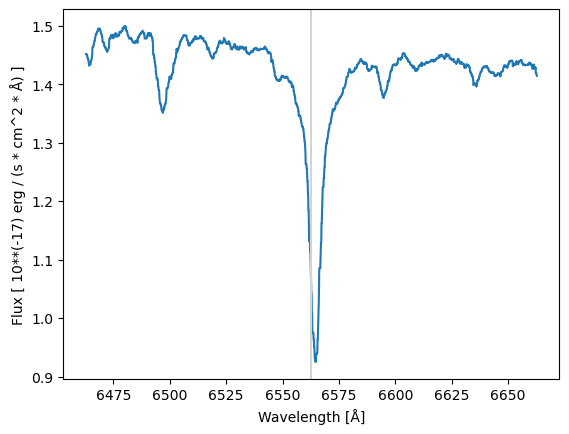

In [42]:
# Ας εστιάσουμε σε κάποια γραμμή απορρόφησης για κάποιο αστερι
# θα χρειαστεί να τρέξετε τον κώδικα για πολλές γραμμές κι αστέρια.

selected_star="G0"
selected_line = "Ha"

wavelength_init=spectra[selected_star][0]
flux_init=spectra[selected_star][1]

central_l= lines[selected_line]["lam"] # επιλεχθέν μήκος κύματος (διαλέγετε από παραπάνω λεξικό ή απλά βάλετε την τιμή με το χέρι σε Α)
dl = 100                               # βρείτε κατάλληλο εύρος του κομμενου φάσματος (σε A) γύρω από τη γραμμή που να ξεπερνάει (αρκετα)
                                       # τη διακριτική ικανότητα του οργάνου και να δίνει καλή μετρηση του συνεχούς.

# πινακας με True / False για τη συνθηκη
selected_range = (wavelength_init >= central_l-dl) & (wavelength_init <= central_l+dl)

# αντικατάσταση των πινάκων με νεους πίνακες, που εχουν μονο τις τιμές εκεί όπου η συνθήκη είναι True.
wavelength = wavelength_init[selected_range]
flux = flux_init[selected_range]

plt.plot(wavelength, flux)
plt.axvline(central_l,color='lightgrey')
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [ 10**(-17) erg / (s * cm^2 * Å) ]")
#plt.ylim(min(flux),max(flux))


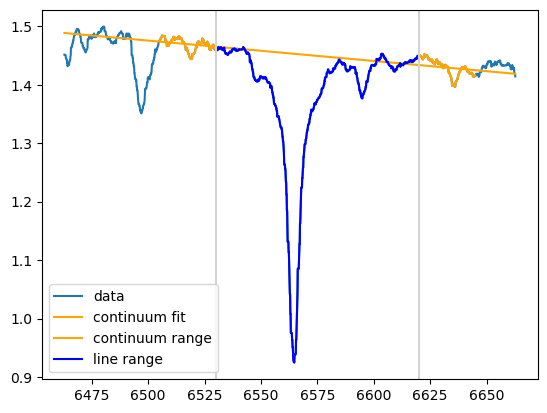

In [43]:
# Τώρα ας ξεχωρίσουμε κι ας φιτάρουμε το συνεχές, χρησιμοποιώντας μια ευθεία, κι ας ορίσουμε το ευρος της γραμμής

# Η μάσκα είναι σε Α. Θα πρέπει να αλλαζει για κάθε φασματική γραμμή.

mask_left =lines[selected_line]["cont_left"]  # η έτοιμη τιμή ή απλά βάζετε ένα δικο σας πίνακα, π.χ., [6505, 6530]
mask_right=lines[selected_line]["cont_right"]

wavelength_left = np.mean(mask_left)    # μέση τιμή του αντίστοιχου εύρους
wavelength_right = np.mean(mask_right)

cont_left  = (wavelength > mask_left[0])  & (wavelength < mask_left[1] ) # πίνακας με True/False εαν τηρείται η συνθηκη.
cont_right = (wavelength > mask_right[0]) & (wavelength < mask_right[1] )
cont = cont_left | cont_right # αριστερό ή δεξί παραθυρο = συνολο συνεχους

flux_left = np.mean( flux[ cont_left ] ) # μέση τιμή της ροής, για pixel στα οποία ισχύει η συνθήκη του μήκους κύματος
flux_right = np.mean( flux[ cont_right] )

slope= (flux_right-flux_left)/(wavelength_right-wavelength_left)
continuum = slope*(wavelength-wavelength_left) + flux_left

plt.plot(wavelength, flux, label='data')
plt.plot(wavelength, continuum, color='orange',label='continuum fit')

in_line = (wavelength > mask_left[1]) & (wavelength < mask_right[0])
plt.plot( wavelength[cont_left], flux[cont_left],color='orange', label='continuum range')
plt.plot( wavelength[cont_right], flux[cont_right],color='orange')
plt.plot( wavelength[in_line], flux[in_line], color='blue',label='line range')
plt.axvline(mask_left[1],color='lightgrey')
plt.axvline(mask_right[0],color='lightgrey')

plt.legend()

In [44]:
# Τώρα η ροή της γραμμής: μετά την αφαίρεση του συνεχούς, αθροίζουμε το εμβαδον y*dx σε όλα τα pixel εντός των ορίων.

dlambda = wavelength[1]-wavelength[0]

line_flux = np.abs( np.sum((flux[in_line] - continuum[in_line])) * dlambda )  # 1e-17 erg / s /cm^2

print("Flux",line_flux, "*1e-17 erg/s/cm^2")

Flux 5.434956150131808 *1e-17 erg/s/cm^2


In [53]:
# έλεγχος εαν η ανίχνευση ειναι σημαντική (πάνω από το θόρυβο)

# θόρυβος ανά pixel <-> standard deviation
noise_per_pixel = np.std((flux[cont] - continuum[cont]))*dlambda
n_pixels = len( wavelength[in_line] )
noise = np.sqrt(n_pixels)*noise_per_pixel

print("Signal-to-Noise ratio: ",line_flux/noise)

Signal-to-Noise ratio:  164.39758804446112


In [55]:
# Yπολογισμός equivalent width. 

EW = np.sum((1.0 - flux[in_line] / continuum[in_line]) * dlambda)

print("Equivalent width:",EW )

Equivalent width: 3.741786285542686


In [47]:
# Ερωτηματα άσκησης

# 1) κάντε την μέτρηση του EW της Ηα για όλα τα αστέρια και βρείτε σε ποιό είναι μέγιστη.
# 2) για τον αστέρα F0, χρησιμοποιείστε τα EW της Hδ (n=2->6) και της Paschen 3->7 για να υπολογίσετε τη θερμοκρασία του αστέρα.
#     Συγκρίνετε τη θερμοκρασία που βγάλατε με αυτή του μελανου σώματος που περιγράφει τη συνεχή εκπομπή στο παρακάτω σχημα.

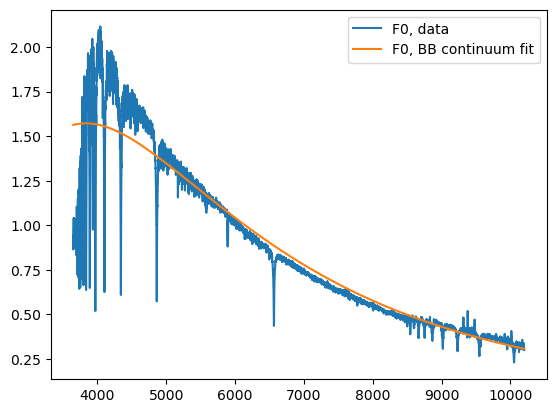

In [48]:
# Σύγκριση με θεωρητική τιμή BB

def black_body_luminosity(wavelength,T=1000): #wavelength in Angstrom
    h,c, kb, = 6.626e-27 ,2.9979e18, 1.38e-16    #	erg/Hz, cm/s, erg/K
    #nu = c/(wavelength*1e-8)
    B_lambda = 2*h*c**2/ wavelength**5/(np.exp(h*c/(wavelength*kb*T))-1)
    return B_lambda/np.mean(B_lambda) # in erg/s/Angstrom/cm^2/sr from the emitting object's surface

i = "F0"
x=spectra[i][0]
y=spectra[i][1]/np.mean(spectra[i][1])

planck = black_body_luminosity(x,stars[i]) # θεωρητική θερμοκρασία αστέρα, βάσει συνεχούς
y_model = planck/np.mean(planck)

# καντε overplot ένα μελαν σωμα με την Τ που βρήκατε από τα EW των γραμμών του Η.
plt.plot(x,y, label=i+", data")
plt.plot(x,y_model,label=i+", BB continuum fit")
plt.legend();